# Homework 1

# Classical Mechanics

# José Pablo Cuevas Cázares


In [66]:
import sympy as sp
import sympy.physics.mechanics as mech
mech.init_vprinting()
from IPython.display import display,Math,Latex

In [67]:
# time parameter definition.
t=sp.Symbol("t",positive=True);

# Mass of the analyzed particle 
m=sp.Symbol("m", positive=True);

#Gravitational acceleration vector symbol
g=sp.Symbol("g");

In [68]:
# Inner product function between two vectors. It will be useful in the computation of the potential energy. 

def inner_prod (a,b):
    
    if (len(a)!=len(b)):
        print("Vector dimensions do not match. Inner product not possible!");
        return None;
    
    s=0;
    
    for i in range (0,len(a)):
        s=s+a[i]*b[i];
        
    return s;

# Kinetic and potential energy 

In this section kinetic and potential energies are defined, under the assumption that they are applied to the center of mass of a rigid body (or a single particle in the simplest case), denoted by $M$. The kinetic energy is then defined as the sum of its $\textit{translational}$ kinetic energy and its $\textit{rotational}$ kinetic energy.

$T := \frac{1}{2} M|\dot{\overrightarrow{x}}| +\frac{1}{2}I\omega^2$, $T=T(\overrightarrow{x},\dot{\overrightarrow{x}},\overrightarrow{\omega},t)$

whereas the potential energy is defined as 

$U:=-\overrightarrow{F}\cdot\overrightarrow{x}$, $U=U(\overrightarrow{x},t)$

where $\overrightarrow{F}$ is the force on the particle due to an external $\textit{uniform}$ field.

In [69]:
# Kinetic energy function.

def T (x, I, ang):
    #This function assumes x is the position vector in cartesian coordinates.
    
    global t, m;
    
    v=0;
    
    for i in x:
        v=v+sp.simplify(sp.diff(i,t)**2);
        
    return sp.simplify(m/2*v+I/2*sp.diff(ang,t)**2);

In [70]:
# Potential energy function. 
def U (x,F,Uext): 
                        
    global t;

    return -inner_prod(F,x)+Uext;

# Lagrangian, generalized coordinates and equations of motion (EOM)

In [71]:
#Lagrangian function definition.

def L (system):
    global t,m;
    
    x=system[0];
    F=system[1];
    Uext=system[2];
    I=system[3];
    ang=system[4];
        
    return T(x, I, ang)-U(x,F,Uext);

In [72]:
# Function that calculates the equations of motion. Lambda and f are vectors whose components are the Lagrangian multipliers
# and their respective holonomic restrictions.

def EOM (L,q, Lambda, f):
    
    global t;
    
    LagEq=[];
    const=0;
    
    for i in range (0,len(q),1):
        for j in range (0,len(Lambda),1):
            const=const+Lambda[j]*sp.diff(f[j],q[i]);
            
        Eq=sp.diff(sp.diff(L,sp.diff(q[i],t)),t)-sp.diff(L,q[i])-const;
        sp.simplify(Eq);
        LagEq.append(Eq);
        const=0;
    return LagEq; 

# Problem 1

In [73]:
# Parameters for Problem 1
l=sp.Symbol("l");

# Force field
F1=[0,0,-m*g]; 

# Generalized coordinates
theta=sp.Function("theta")(t);
phi=sp.Function("phi")(t);

q1=[theta,phi];

#Position vector 
x1=[l*sp.sin(theta)*sp.cos(phi),l*sp.sin(theta)*sp.sin(phi),-l*sp.cos(theta)];

system1=[x1,F1,0,0,0];

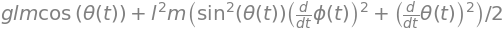

In [74]:
Lag1=L(system1);
Lag1

In [75]:
sp.latex(Lag1)

'g l m \\cos{\\left(\\theta{\\left(t \\right)} \\right)} + \\frac{l^{2} m \\left(\\sin^{2}{\\left(\\theta{\\left(t \\right)} \\right)} \\left(\\frac{d}{d t} \\phi{\\left(t \\right)}\\right)^{2} + \\left(\\frac{d}{d t} \\theta{\\left(t \\right)}\\right)^{2}\\right)}{2}'

In [76]:
EOM1=EOM(Lag1,q1,[],[]);

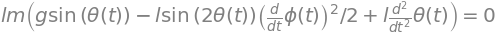

In [77]:
EOM1theta=EOM1[0]
sp.simplify(sp.Eq(EOM1theta,0))

In [78]:
print(sp.latex(EOM1theta))

g l m \sin{\left(\theta{\left(t \right)} \right)} - l^{2} m \sin{\left(\theta{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2} + l^{2} m \frac{d^{2}}{d t^{2}} \theta{\left(t \right)}


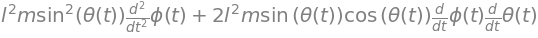

In [79]:
EOM1phi=EOM1[1];
#EOM1phi=sp.simplify(sp.Eq(EOM1phi,0));
EOM1phi

In [80]:
sp.latex(EOM1phi)

'l^{2} m \\sin^{2}{\\left(\\theta{\\left(t \\right)} \\right)} \\frac{d^{2}}{d t^{2}} \\phi{\\left(t \\right)} + 2 l^{2} m \\sin{\\left(\\theta{\\left(t \\right)} \\right)} \\cos{\\left(\\theta{\\left(t \\right)} \\right)} \\frac{d}{d t} \\phi{\\left(t \\right)} \\frac{d}{d t} \\theta{\\left(t \\right)}'

# Problem 2

In [81]:
# Parameters for Problem 2
a, M, R, omega =sp.symbols("a, M, R, omega");

# Force field 
F2=[0,0,-m*g];

#Generalized coordinates 
theta=sp.Function("theta")(t);

q2=[theta];

# Position vector
phi=sp.Function("phi")(t);
x2=[a*sp.sin(theta)*sp.sin(phi),a*sp.sin(theta)*sp.cos(phi),-a*sp.cos(theta)];

# Moment of inertia of the hoop 
Ihoop=M*R**2/2;

# Hoop's angle of rotation
anghoop=sp.Function("psi")(t);

# System 2 vector
system2=[x2,F2,0,Ihoop,anghoop];

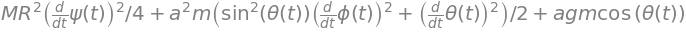

In [82]:
Lag2=L(system2);
Lag2

In [83]:
print(sp.latex(Lag2))

\frac{M R^{2} \left(\frac{d}{d t} \psi{\left(t \right)}\right)^{2}}{4} + \frac{a^{2} m \left(\sin^{2}{\left(\theta{\left(t \right)} \right)} \left(\frac{d}{d t} \phi{\left(t \right)}\right)^{2} + \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2}\right)}{2} + a g m \cos{\left(\theta{\left(t \right)} \right)}


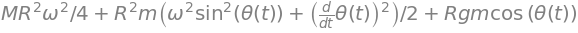

In [84]:
# The constrains of the problem are that a=R and dphi_hoop/dt=dphi/dt=omega, so substituting them in the Lagrangian yields

# Hoop's angular velocity variable
omega=sp.Symbol("omega");

Lag2=Lag2.subs([(a,R),(sp.diff(phi,t),omega),(sp.diff(anghoop,t),omega)]);
Lag2

In [85]:
print(sp.latex(Lag2))

\frac{M R^{2} \omega^{2}}{4} + \frac{R^{2} m \left(\omega^{2} \sin^{2}{\left(\theta{\left(t \right)} \right)} + \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2}\right)}{2} + R g m \cos{\left(\theta{\left(t \right)} \right)}


In [86]:
EOM2=EOM(Lag2,q2,[],[]);

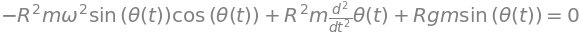

In [87]:
EOM2theta=EOM2[0];
EOM2theta=sp.Eq(EOM2theta,0);
EOM2theta

In [88]:
print(sp.latex(EOM2theta))

- R^{2} m \omega^{2} \sin{\left(\theta{\left(t \right)} \right)} \cos{\left(\theta{\left(t \right)} \right)} + R^{2} m \frac{d^{2}}{d t^{2}} \theta{\left(t \right)} + R g m \sin{\left(\theta{\left(t \right)} \right)} = 0


# Problem 3

In [89]:
# Parameters for Problem 3
l_0, k = sp.symbols("l_0, k");

# External field
F3=[0,-m*g];

# Generalized coordinates 
theta=sp.Function("theta")(t);
r=sp.Function("r")(t);

q3=[r,theta];

# Position vector
x3=[r*sp.sin(theta),-r*sp.cos(theta)];

# For a general spring, the potential is of the form U(x) = (1/2)kx^2, where x is understood to be the distance between
# the equilibrium position and an arbitrary elongated point x. The "external" potential of the system is then 

Uext=sp.Rational(1/2)*k*(r-l_0)**2;

# System 3 vector
system3=[x3,F3,Uext,0,0];

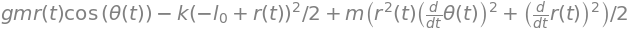

In [90]:
Lag3=L(system3);
Lag3

In [91]:
sp.latex(Lag3)

'g m r{\\left(t \\right)} \\cos{\\left(\\theta{\\left(t \\right)} \\right)} - \\frac{k \\left(- l_{0} + r{\\left(t \\right)}\\right)^{2}}{2} + \\frac{m \\left(r^{2}{\\left(t \\right)} \\left(\\frac{d}{d t} \\theta{\\left(t \\right)}\\right)^{2} + \\left(\\frac{d}{d t} r{\\left(t \\right)}\\right)^{2}\\right)}{2}'

In [92]:
EOM3=EOM(Lag3,q3,[],[]);

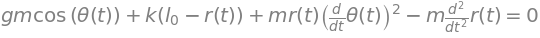

In [93]:
EOM3r=EOM3[0];
EOM3r=sp.simplify(sp.Eq(EOM3r,0));
EOM3r

In [94]:
sp.latex(EOM3r)

'g m \\cos{\\left(\\theta{\\left(t \\right)} \\right)} + k \\left(l_{0} - r{\\left(t \\right)}\\right) + m r{\\left(t \\right)} \\left(\\frac{d}{d t} \\theta{\\left(t \\right)}\\right)^{2} - m \\frac{d^{2}}{d t^{2}} r{\\left(t \\right)} = 0'

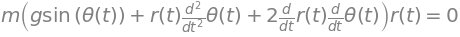

In [95]:
EOM3theta=EOM3[1];
EOM3theta=sp.simplify(sp.Eq(EOM3theta,0));
EOM3theta

In [96]:
sp.latex(EOM3theta)

'm \\left(g \\sin{\\left(\\theta{\\left(t \\right)} \\right)} + r{\\left(t \\right)} \\frac{d^{2}}{d t^{2}} \\theta{\\left(t \\right)} + 2 \\frac{d}{d t} r{\\left(t \\right)} \\frac{d}{d t} \\theta{\\left(t \\right)}\\right) r{\\left(t \\right)} = 0'

# Problem 4

In [97]:
# Problem 4 parameters
s=sp.Function("s")(t);

# Force field 
F4=[0,-m*g];

# Generalized coordinates 
theta=sp.Function("theta")(t);

q4=[theta];

#Position vector 
x4=[s*sp.sin(theta), -s*sp.cos(theta)];

# System 4 vector
system4=[x4,F4,0,0,0];

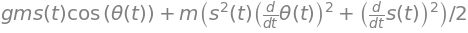

In [98]:
Lag4=L(system4);
Lag4

In [99]:
sp.latex(Lag4)

'g m s{\\left(t \\right)} \\cos{\\left(\\theta{\\left(t \\right)} \\right)} + \\frac{m \\left(s^{2}{\\left(t \\right)} \\left(\\frac{d}{d t} \\theta{\\left(t \\right)}\\right)^{2} + \\left(\\frac{d}{d t} s{\\left(t \\right)}\\right)^{2}\\right)}{2}'

In [100]:
EOM4=EOM(Lag4,q4,[],[]);

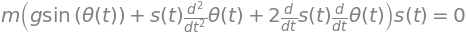

In [101]:
EOM4theta=EOM4[0];
EOM4theta=sp.simplify(sp.Eq(EOM4theta,0));
EOM4theta

In [102]:
sp.latex(EOM4theta)

'm \\left(g \\sin{\\left(\\theta{\\left(t \\right)} \\right)} + s{\\left(t \\right)} \\frac{d^{2}}{d t^{2}} \\theta{\\left(t \\right)} + 2 \\frac{d}{d t} s{\\left(t \\right)} \\frac{d}{d t} \\theta{\\left(t \\right)}\\right) s{\\left(t \\right)} = 0'

# Problem 5

In [103]:
# Problem 5 parameters
R, r = sp.symbols("R, r");

# The hoop's center of mass is located at its center, so setting up a coordinate system whose origin lies at the center of the 
# cylinder the hoop's center of mass will be (in magnitude) at R+r.

# Generalized coordinates 

l=sp.Function("l")(t);
theta=sp.Function("theta")(t);
anghoop=sp.Function("psi")(t); # Angle of rotation of the hoop with respecto the x axis

q5=[l,theta,anghoop];

#Position vector 
x5=[0,l*sp.sin(theta),l*sp.cos(theta)];

# Moment of inertia of the hoop 
Ihoop=m*r**2;

# Force field 
F5=[0,0,-m*g];

# System 5 vector
system5=[x5,F5,0,Ihoop,anghoop];

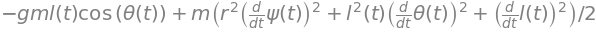

In [104]:
Lag5=L(system5);
Lag5

In [105]:
print(sp.latex(Lag5))

- g m l{\left(t \right)} \cos{\left(\theta{\left(t \right)} \right)} + \frac{m \left(r^{2} \left(\frac{d}{d t} \psi{\left(t \right)}\right)^{2} + l^{2}{\left(t \right)} \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2} + \left(\frac{d}{d t} l{\left(t \right)}\right)^{2}\right)}{2}


In [106]:
# There are two constraints on the system
f_1=sp.Function("f_1")(l);
f_2=sp.Function("f_2")(theta,anghoop);

f5=[f_1,f_2];

# Hence there are two undetermined Lagrangian multipliers
Lambda_1=sp.Symbol("lambda_1");
Lambda_2=sp.Symbol("lambda_2");

Lambda5=[Lambda_1, Lambda_2];

In [107]:
# The corresponding EOM (with restrictions are)
EOM5=EOM(Lag5,q5,Lambda5,f5);

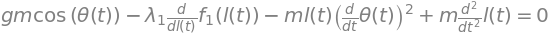

In [108]:
EOM5l=EOM5[0];
EOM5l=sp.simplify(sp.Eq(EOM5l,0));
EOM5l

In [109]:
print(sp.latex(EOM5l))

g m \cos{\left(\theta{\left(t \right)} \right)} - \lambda_{1} \frac{d}{d l{\left(t \right)}} \operatorname{f_{1}}{\left(l{\left(t \right)} \right)} - m l{\left(t \right)} \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2} + m \frac{d^{2}}{d t^{2}} l{\left(t \right)} = 0


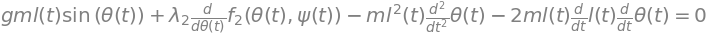

In [110]:
EOM5theta=EOM5[1];
EOM5theta=sp.simplify(sp.Eq(EOM5theta,0));
EOM5theta

In [111]:
print(sp.latex(EOM5theta))

g m l{\left(t \right)} \sin{\left(\theta{\left(t \right)} \right)} + \lambda_{2} \frac{d}{d \theta{\left(t \right)}} \operatorname{f_{2}}{\left(\theta{\left(t \right)},\psi{\left(t \right)} \right)} - m l^{2}{\left(t \right)} \frac{d^{2}}{d t^{2}} \theta{\left(t \right)} - 2 m l{\left(t \right)} \frac{d}{d t} l{\left(t \right)} \frac{d}{d t} \theta{\left(t \right)} = 0


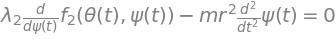

In [112]:
EOM5psi=EOM5[2];
EOM5psi=sp.simplify(sp.Eq(EOM5psi,0));
EOM5psi

In [113]:
print(sp.latex(EOM5psi))

\lambda_{2} \frac{d}{d \psi{\left(t \right)}} \operatorname{f_{2}}{\left(\theta{\left(t \right)},\psi{\left(t \right)} \right)} - m r^{2} \frac{d^{2}}{d t^{2}} \psi{\left(t \right)} = 0


In [114]:
# The first constraint reads f_1(l)=l-R-r=0 so dl/dt=d^2/dl^2=0
f1=l-R-r;

# The second constraint reads f_2(theta,psi)=(r+R)*theta=r*psi
f2=(r+R)*theta-r*anghoop;

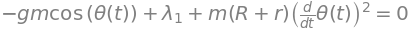

In [115]:
# The resulting EOM are
Eq1=sp.simplify(EOM5l.subs([(f_1,f1),(sp.diff(l,t),0),(sp.diff(sp.diff(l,t),t),0),(l,R+r)]));
Eq1

In [116]:
print(sp.latex(Eq1))

- g m \cos{\left(\theta{\left(t \right)} \right)} + \lambda_{1} + m \left(R + r\right) \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2} = 0


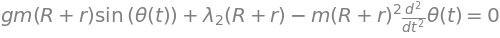

In [117]:
Eq2=sp.simplify(EOM5theta.subs([(f_2,f2),(sp.diff(l,t),0),(l,R+r)]));
Eq2

In [118]:
print(sp.latex(Eq2))

g m \left(R + r\right) \sin{\left(\theta{\left(t \right)} \right)} + \lambda_{2} \left(R + r\right) - m \left(R + r\right)^{2} \frac{d^{2}}{d t^{2}} \theta{\left(t \right)} = 0


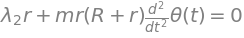

In [119]:
Eq3=sp.simplify(EOM5psi.subs([(f_2,f2),(anghoop,(r+R)/r*theta)]));
Eq3

In [120]:
print(sp.latex(Eq3))

\lambda_{2} r + m r \left(R + r\right) \frac{d^{2}}{d t^{2}} \theta{\left(t \right)} = 0


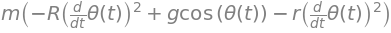

In [121]:
# Using Eq1 to solve for the first mulitplier
EqLambda1=sp.simplify(sp.solve(Eq1,Lambda_1)[0]);
EqLambda1

In [122]:
print(sp.latex(EqLambda1))

m \left(- R \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2} + g \cos{\left(\theta{\left(t \right)} \right)} - r \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2}\right)


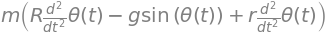

In [123]:
# Using Eq2 and Eq3 to solve for the second multiplier
Eq1Lambda2=sp.simplify(sp.solve(Eq2,Lambda_2)[0]);
Eq1Lambda2

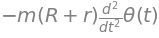

In [124]:
Eq2Lambda2=sp.simplify(sp.solve(Eq3,Lambda_2)[0]);
Eq2Lambda2

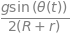

In [125]:
# Solving for (d^2theta/dtheta^2)^2 using Eq1Lambda2 and Eq2Lambda2
d2theta2=sp.simplify(sp.solve(Eq1Lambda2-Eq2Lambda2,sp.diff(sp.diff(theta,t),t))[0]);
d2theta2

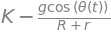

In [126]:
# Multiplying both sides of the previous expression by dtheta/dt and integrating yields
K=sp.Symbol("K");

d2theta2=-g*sp.cos(theta)/(R+r)+K;
d2theta2

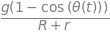

In [127]:
# Noting that dtheta/dt=0 at theta(0)=0 yields
Kn=g/(R+r);

d2theta2=sp.simplify(d2theta2.subs(K,Kn));
d2theta2

In [128]:
# Substituting this result in the equation for lamba1 yields
Eq2Lambda1=sp.simplify(EqLambda1.subs(sp.diff(theta,t)**2,d2theta2));
Eq2Lambda1

In [129]:
# When the magnitude of the normal force is zero (lambda1=0), the angle will be 

theta_n=sp.solve(Eq2Lambda1,theta);
theta_n